# BootCamp 2019 - Week 1

## Dynamic Programming - Homework 1

Author: Martina Fraschini

### Question 1 - Asset market equilibrium

In this economy each agent $h$ maximizes his own utility function:
$$ \max_{c^h_0, c^h_s, \theta^h_1, \theta^h_2} u(c^h_0)+\frac{1}{S}\sum^S_{s=1} u(c^h_s) $$
subject to:
$$ c^h_0=e^h_0-q_1\theta^h_1-q_2\theta^h_2 $$
$$$$
$$ c^h_s=e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s $$

where $u(c)=\frac{c^{1-\gamma}}{1-\gamma}$ is the von Neumann-Morgenstern utility, $S$ are the states of the world in the second period, $c^h_0$ is the consumption of agent $h$ in the first period, $c^h_s$ are the consumptions of agent $h$ in the second period in each state, $e^h_0$ is the initial endowment, $e^h_s$ are the final endowments, $\theta^h_1$ and $\theta^h_2$ are the amount of asset holding, $q_1$ and $q_2$ the respective prices, $A^1_s$ and $A^2_s$ the respective payoffs in each state of the world.

If we substitute the budget constraints in the value function, we obtain:
$$ \max_{\theta^h_1,\theta^h_2} u(e^h_0-q_1\theta^h_1-q_2\theta^h_2)+\frac{1}{S}\sum^S_{s=1} u(e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s) $$

The 4 equations for the FOCs are given by:
$$ q_iu'(e^h_0-q_1\theta^h_1-q_2\theta^h_2)=\frac{1}{S}\sum^S_{s=1} A^i_s u'(e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s) $$
that can be rewritten as:
$$ q_i(e^h_0-q_1\theta^h_1-q_2\theta^h_2)^{-\gamma}=\frac{1}{S}\sum^S_{s=1} A^i_s (e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s)^{-\gamma} $$

The market clearing conditions are:
$$ \theta^1_1+\theta^2_1=0 $$
$$$$
$$ \theta^1_2+\theta^2_2=0 $$

We'll solve the system of 6 equations (FOCs and market clearing) for the following 6 variables: $\theta^1_1, \theta^1_2, \theta^2_1, \theta^2_2, q_1, q_2$.

In [1]:
# import package
import numpy as np
from scipy.optimize import fsolve

# define system of equations
def system(x):
    a1 = np.array([1,1,1,1])
    a2 = np.array([1,1,1.5,1.5])
    e1 = np.array([1,2,1,2])
    e2 = np.array([3,1,3,1])
    foc1 = x[4]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma) - .25*sum(a1*(e1+x[0]*a1+x[1]*a2)**(-gamma)) 
    foc2 = x[4]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma) - .25*sum(a1*(e2+x[2]*a1+x[3]*a2)**(-gamma))
    foc3 = x[5]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma) - .25*sum(a2*(e1+x[0]*a1+x[1]*a2)**(-gamma))
    foc4 = x[5]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma) - .25*sum(a2*(e2+x[2]*a1+x[3]*a2)**(-gamma))
    mk1 = x[0] + x[2]
    mk2 = x[1] + x[3]
    return (foc1, foc2, foc3, foc4, mk1, mk2)

valuesgamma = np.array([2,4,8,166])
print('{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}'.format('gamma','theta^1_1','theta^1_2','theta^2_1','theta^2_2','q1','q2'))
print('-'*85)
for g in valuesgamma:
    gamma = g
    sol = fsolve(system, [.5,.5,.5,.5,.5,.5])
    print('{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}'.format(g,round(sol[0],5),round(sol[1],5),round(sol[2],5),round(sol[3],5),round(sol[4],5),round(sol[5],5)))

       gamma   theta^1_1   theta^1_2   theta^2_1   theta^2_2          q1          q2
-------------------------------------------------------------------------------------
           2     0.01954        -0.0    -0.01954         0.0     0.58978     0.73722
           4     0.00403         0.0    -0.00403        -0.0     0.51866     0.64833
           8     0.00016         0.0    -0.00016        -0.0     0.50101     0.62627
         166         0.0        -0.0        -0.0         0.0         0.5       0.625


### Question 2 - Tic Tac Toe

### Question 3 - Ramsey I

Converged after iteration 172


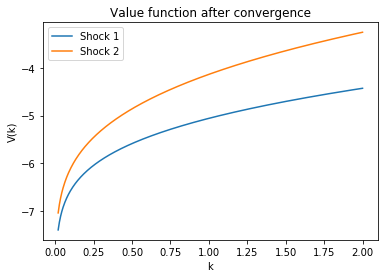

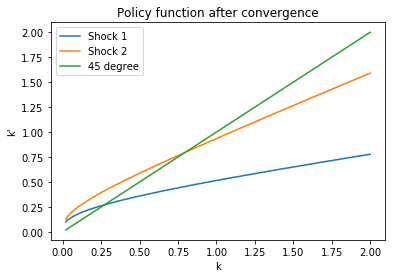

In [3]:
# import package
import numpy as np
from matplotlib import pyplot as plt

# define grid of values for capital k and for shock s
N = 500
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 shocks
f = np.zeros_like(k_grid)
f[0,:] = 0.9*k_grid[0,:]**0.3 + 0.3*k_grid[0,:]
f[1,:] = 1.1*k_grid[1,:]**0.3 + 0.9*k_grid[1,:]

# initialize value function
V_init = np.zeros_like(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define utility function
def u(c):
    return np.log(c)

def vf_update(V_old):
    V_new = np.zeros_like(V_old)
    policy = np.zeros_like(V_old)
    
    for i in range(N):
        for s in range(2):
            V_action = np.zeros_like(k_grid[0,:])
            c = f[s, i] - k_grid[0,:]
            V_action[c <= 0] = -999999
            V_action[c > 0] = u(c[c > 0]) + beta*(0.5*V_old[0, c > 0] + 0.5*V_old[1, c > 0])
            V_new[s,i] = max(V_action[:])
            policy[s,i] = k_grid[0,np.argmax(V_action[:])]
    
    return V_new, policy

# iterate until convergence
V = V_init.copy()

for iteration in range(max_iterations):
    V_new, policy_k = vf_update(V)
    difference = np.max(abs(V_new - V))
    
    V = V_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], V[1,:], label="Shock 2")
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.legend()
        plt.title('Value function after convergence')
        plt.show()
        
        plt.figure()
        plt.plot(k_grid[0,:], policy_k[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], policy_k[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        break


### Question 4 - Stochastic Ramsey model, time iteration collocation

#### Part a - discrete shocks

In the Ramsey model, we define the Bellman equation as:

$$ V(k,s)=\max_{k'} u(f(s,k)-k')+\beta E_{s,k}[V(s',k')] $$

FOC:

$$ -u'(f(s,k)-k')+\beta E_{s,k}[f_k(s',k')u'(f(s',k')-k'')]=0 $$

Euler equation:

$$ u'(f(s,k)-k')=\beta E_{s,k}[f_k(s',k')u'(f(s',k')-k'')] $$

Converged after iteration 26


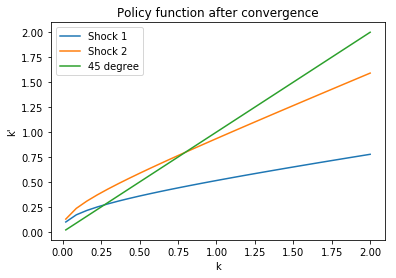

In [4]:
# import package
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root

# define grid of values for capital k and for shock s
N = 30
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 shocks
kp_grid = np.copy(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    expectation1 = f1(x,0) * u1(f(x,0)-np.interp(x,k_grid[0,:],k_old[0,:]))
    expectation2 = f1(x,1) * u1(f(x,1)-np.interp(x,k_grid[1,:],k_old[1,:]))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like(k_grid) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break


Change $\beta$ and $u(c)$:

Converged after iteration 63


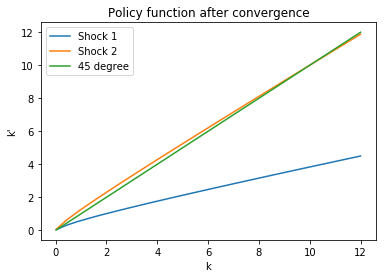

In [5]:
# import package
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root

# define grid of values for capital k and for shock s
N = 30
k_low = 0.02
k_high = 12
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 shocks
kp_grid = np.copy(k_grid)

# define parameters
beta = .999
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return -c**(-4)

def u1(c):
    return 4*c**(-5)

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    expectation1 = f1(x,0) * u1(f(x,0)-np.interp(x,k_grid[0,:],k_old[0,:]))
    expectation2 = f1(x,1) * u1(f(x,1)-np.interp(x,k_grid[1,:],k_old[1,:]))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like(k_grid) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break

Approximating the policy function by a polynomial of degree 5:

Converged after iteration 27


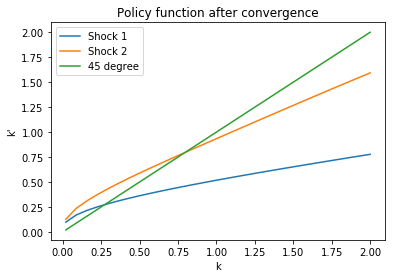

In [6]:
# import package
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root

# define grid of values for capital k and for shock s
N = 30
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 shocks
kp_grid = np.copy(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    poly5_1 = np.poly1d(np.polyfit(k_grid[0,:],k_old[0,:],5))
    poly5_2 = np.poly1d(np.polyfit(k_grid[1,:],k_old[1,:],5))
    expectation1 = f1(x,0) * u1(f(x,0)-poly5_1(x))
    expectation2 = f1(x,1) * u1(f(x,1)-poly5_2(x))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like(k_grid) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break


Approximating the policy function by cubic splines:

Converged after iteration 26


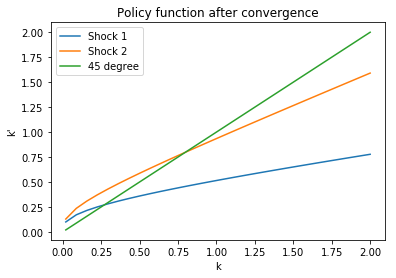

In [8]:
# import package
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root
import scipy.interpolate

# define grid of values for capital k and for shock s
N = 30
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 shocks

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    spline1 = scipy.interpolate.CubicSpline(k_grid[0,:],k_old[0,:],5)
    spline2 = scipy.interpolate.CubicSpline(k_grid[1,:],k_old[1,:],5)
    expectation1 = f1(x,0) * u1(f(x,0)-spline1(x))
    expectation2 = f1(x,1) * u1(f(x,1)-spline2(x))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like(k_grid) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break


#### Part b - AR(1) shocks

In [9]:
# From BootCamp 2018
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import scipy.integrate as integrate

def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.
    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process
    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu - (num - 1) / 2 * step, mu + (num - 1) / 2 * step,
                        num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2],
                      [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)],
                      [(1-p)**2, (1-p)*q, q**2]]).T

    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p*np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
        + (1 - p)*np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
        + (1 - q)*np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
        + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.

    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp


def tauchenhussey(N, mu, rho, sigma, baseSigma):
    """
    Function tauchenhussey
    Purpose:    Finds a Markov chain whose sample paths
                approximate those of the AR(1) process
                    z(t+1) = (1-rho)*mu + rho * z(t) + eps(t+1)
                where eps are normal with stddev sigma
    Format:     {Z, Zprob} = TauchenHussey(N,mu,rho,sigma,m)
    Input:      N         scalar, number of nodes for Z
            mu        scalar, unconditional mean of process
            rho       scalar
            sigma     scalar, std. dev. of epsilons
            baseSigma scalar, std. dev. used to calculate Gaussian
            quadrature weights and nodes, i.e. to build the
            grid. I recommend that you use
            baseSigma = w*sigma +(1-w)*sigmaZ where sigmaZ = \
                    sigma/sqrt(1-rho^2),
                and w = 0.5 + rho/4. Tauchen & Hussey recommend
                baseSigma = sigma, and also mention baseSigma = sigmaZ.
    Output:     Z       N*1 vector, nodes for Z
                Zprob   N*N matrix, transition probabilities
    Author:     Benjamin Tengelsen, Carnegie Mellon University (python)
                Martin Floden, Stockholm School of Economics (original)
                January 2007 (updated August 2007)
    This procedure is an implementation of Tauchen and Hussey's
    algorithm, Econometrica (1991, Vol. 59(2), pp. 371-396)
    """

    Z = np.zeros((N, 1))
    Zprob = np.zeros((N, N))
    [Z, w] = gaussnorm(N, mu, baseSigma ** 2)
    for i in range(N):
        for j in range(N):
            EZprime = (1 - rho) * mu + rho * Z[i]
            Zprob[i, j] = (w[j] * st.norm.pdf(Z[j], EZprime, sigma) /
                           st.norm.pdf(Z[j], mu, baseSigma))

    for i in range(N):
        Zprob[i, :] = Zprob[i, :] / sum(Zprob[i, :])

    return Z.T, Zprob


def gaussnorm(n, mu, s2):
    """
    Find Gaussian nodes and weights for the normal distribution
    n  = # nodes
    mu = mean
    s2 = variance
    """
    [x0, w0] = gausshermite(n)
    x = x0 * np.sqrt(2. * s2) + mu
    # print(s2,mu)
    # print(x)
    w = w0 / np.sqrt(np.pi)
    return [x, w]


def gausshermite(n):
    """
    Gauss Hermite nodes and weights following 'Numerical Recipes for C'
    """

    MAXIT = 10
    EPS = 3e-14
    PIM4 = 0.7511255444649425

    x = np.zeros((n, 1))
    w = np.zeros((n, 1))

    m = int((n + 1) / 2)
    for i in range(m):
        if i == 0:
            z = np.sqrt((2. * n + 1) - 1.85575 * (2. * n+1) ** (-0.16667))
        elif i == 1:
            z = z - 1.14 * (n ** 0.426) / z
        elif i == 2:
            z = 1.86 * z - 0.86 * x[0]
        elif i == 3:
            z = 1.91 * z - 0.91 * x[1]
        else:
            z = 2 * z - x[i - 1]

        for iter in range(MAXIT):
            p1 = PIM4
            p2 = 0.
            for j in range(n):
                p3 = p2
                p2 = p1
                p1 = (z * np.sqrt(2. / (j + 1)) * p2 - np.sqrt(float(j) /
                                                               (j + 1)) * p3)
            pp = np.sqrt(2. * n) * p2
            z1 = z
            z = z1 - p1 / pp
            if np.absolute(z - z1) <= EPS:
                break

        if iter > MAXIT:
            error('too many iterations'), end
        x[i, 0] = z
        x[n - i - 1, 0] = -z
        w[i, 0] = 2. / pp / pp
        w[n - i - 1, 0] = w[i]

    x = x[::-1]
    return [x, w]


def integrand(x, sigma_z, sigma, rho, mu, z_j, z_jp1):
    """
    Integrand in the determination of transition probabilities from the Adda-
    Cooper method.
    """
    val = (np.exp((-1 * ((x - mu) ** 2)) / (2 * (sigma_z ** 2)))
           * (norm.cdf((z_jp1 - (mu * (1 - rho)) - (rho * x)) / sigma)
               - norm.cdf((z_j - (mu * (1 - rho)) - (rho * x)) / sigma)))

    return val


def addacooper(N, mu, rho, sigma):
    """
    Function addacooper
    Purpose:    Finds a Markov chain whose sample paths
                approximate those of the AR(1) process
                    z(t+1) = (1-rho)*mu + rho * z(t) + eps(t+1)
                where eps are normal with stddev sigma
    Format:     {Z, Zprob} = addacooper(N, mu, rho, sigma)
    Input:      N     = scalar, number of nodes for Z
                mu    = scalar, unconditional mean of process
                rho   = scalar, persistence of the AR(1) process
                sigma = scalar, std. dev. of epsilons
    Output:     z_grid = N*1 vector, nodes for Z
                pi     = N*N matrix, transition probabilities
    Author:     Jason DeBacker, University of South Carolina (python)
                Jerome Adda ( Bocconi) and Russell Cooper (Penn State)
                (original)
    This procedure is an implementation of a modified version of Tauchen
    and Hussey's algorithm, Econometrica (1991, Vol. 59(2), pp. 371-396),
    this modification appears in Adda, Jerome and Russell Cooper, *Dynamic
    Economics: Quantitative Methods and Applications, MIT Press (2003)
        """
    # Compute std dev of the stationary distribution of z
    sigma_z = sigma / ((1 - rho ** 2) ** (1 / 2))

    # Compute cut-off values
    z_cutoffs = (sigma_z * norm.ppf(np.arange(N + 1) / N)) + mu

    # compute grid points for z
    z_grid = ((N * sigma_z * (norm.pdf((z_cutoffs[:-1] - mu) / sigma_z)
                              - norm.pdf((z_cutoffs[1:] - mu) / sigma_z)))
              + mu)

    # compute transition probabilities
    pi = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            results = integrate.quad(integrand, z_cutoffs[i], z_cutoffs[i + 1],
                                     args=(sigma_z, sigma, rho, mu,
                                           z_cutoffs[j], z_cutoffs[j + 1]))
            pi[i, j] = (N / np.sqrt(2 * np.pi * sigma_z ** 2)) * results[0]

    return z_grid, pi

Converged after iteration 25


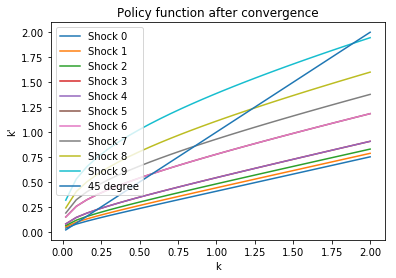

In [11]:
# import package
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root

# define grid of values for capital k and for shock s
N = 30
Ns = 10
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((Ns,N)) # we have Ns shocks

mu = 0
rho = .9
sigma = .1
baseSigma = sigma/np.sqrt(1-rho**2)
A_grid, TP = tauchenhussey(Ns, mu, rho, sigma, baseSigma)
A_grid = A_grid.T

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,a):
    return np.exp(a)*k**0.3 + 0.5*k
    
def f1(k,a):
    return 0.3*np.exp(a)*k**(0.3-1) + 0.5

# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old,A_grid,TP):
    a = A_grid[s]
    expectation = 0
    for ss in range(Ns):
        expectation += TP[s,ss] * f1(x,A_grid[ss]) * u1(f(x,A_grid[ss])-np.interp(x,k_grid[ss,:],k_old[ss,:]))
    return u1(f(k,a)-x) - beta*expectation

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(Ns):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old,A_grid,TP)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like((k_grid)) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        for s in range(Ns):
            plt.plot(k_grid[s,:], k_old[s,:], label="Shock {}".format(s))
        plt.plot(k_grid[0,:], k_grid[0,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break
